__Resources__<br>
I will be using numpy pandas matplotlib and citipy packages and the open weather wrapper

In [16]:
#import dependencies
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests as req
import json
import time
import os
from config import opwther_key
sample_out = "SampleCoords.csv"
import datetime


now = datetime.date.today()

data_file = "sample_data"


In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
appid = opwther_key
settings = {"units": "imperial", "appid":opwther_key}
query_url = f"{url}appid={opwther_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=


__ Gathering Random City Samples__<br>
I will accomplish this by retreiving a city list from citipy by iterating through latitude and longitude<br>
values and retreiving city names where there are matches using the citipy nearest_city function.<br>
This will create duplicates that will be removed before sampling. <br>
The latitude and longitude values will include the entire globe.<br>
I chose to sample the globe in quadrants seperately to ensure even distriubtion of samples<br>

![Lat_Long.gif](attachment:Lat_Long.gif)<br>
Image source = http://learner.org/jnorth/tm/LongitudeIntro.html

In [18]:
#create empty list
north_citylist = []

count = 0
dup = 'no'
#cycle through lat long values
for x in range(0,90,1):
    for y in range(-180,180,1):
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
         #insert first value
        if len(north_citylist) == 0:
            north_citylist.append(citdict)
            count+=1
            continue
        else:
                 #skip record if city is already in dictionary
            for city in north_citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            north_citylist.append(citdict)
            count+=1
        else:
            dup = 'no'
            
north_df = pd.DataFrame({
    'city': [x['city'] for x in north_citylist],
    'country': [x['country'] for x in north_citylist],
    'lat':[x['lat'] for x in north_citylist],
    'long':[x['long'] for x in north_citylist]})

#sample south values for 250 samples
north_sample_df= north_df.sample(250)


In [19]:
#create empty list
south_citylist =[]
count = 0
dup = 'no'
#cycle through lat long values
for x in range(-90,-1,1):
    for y in range(-180,180,1):
        # call nearest_city function from city py and append results to dictionary
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        #insert first value
        if len(south_citylist) == 0:
            south_citylist.append(citdict)
            count+=1
            continue
        #skip record if city is already in dictionary
        else:
            for city in south_citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            south_citylist.append(citdict)
            count+=1
        else:
            dup = 'no'
            
south_df = pd.DataFrame({
    'city': [x['city'] for x in south_citylist],
    'country': [x['country'] for x in south_citylist],
    'lat':[x['lat'] for x in south_citylist],
    'long':[x['long'] for x in south_citylist]})

#sample south values for 250 samples
south_sample_df= south_df.sample(250)


In [21]:
#append both samples to common dataframe
city_sample_df=south_sample_df
city_sample_df=city_sample_df.append(north_sample_df)


city_sample_df.head()
#check results
print(len(city_sample_df))



500


In [22]:
city_sample_df.head()

,city,country,lat,long
507,maltahohe,na,-25,16
859,fenoarivo,mg,-18,46
135,warragul,au,-38,146
240,los andes,cl,-33,-70
330,vao,nc,-31,164


In [23]:
#Validate Sampling moethods
print("Northern Hemisphere City Totals : " + str(len(north_df)))

print("Southern Hemisphere City Totals : " + str(len(south_df)))

Northern Hemisphere City Totals : 6273
Southern Hemisphere City Totals : 1764


__ Key Differences In City Counts__<br>
There are significantly more cities in the northern hemisphere<br>
This validates my sampling method of splitting and joining the samples.<br>




In [ ]:
count = 0
weather_json = []

for index,row in city_sample_df.iterrows():
    count+= 1
    query_url = url + "appid=" + opwther_key + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
        weather_json.append(cityweather)
        city1 = data.get("name")
        city.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
    except:
        #print(f"No data for this city: {row['city']}")
        print(f"Processing Record {count} for {row['city']} , {row['country']}")

        print(query_url)

print("                Data Retrieval Complete")


Processing Record 1 for maltahohe , na
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=maltahohe
Processing Record 2 for fenoarivo , mg
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=fenoarivo
Processing Record 3 for warragul , au
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=warragul
Processing Record 4 for los andes , cl
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=los andes
Processing Record 5 for vao , nc
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=vao
Processing Record 6 for kakonko , tz
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kakonko
Processing Record 7 for mataura , pf
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759

Processing Record 56 for camaragibe , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=camaragibe
Processing Record 57 for orapa , bw
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=orapa
Processing Record 58 for joinville , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=joinville
Processing Record 59 for corpus christi , py
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=corpus christi
Processing Record 60 for panguna , pg
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=panguna
Processing Record 61 for guapore , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=guapore
Processing Record 62 for atherton , au
http://api.openweathermap.org/data/2.5/weather?

Processing Record 111 for chilca , pe
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=chilca
Processing Record 112 for esperance , au
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=esperance
Processing Record 113 for cessnock , au
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=cessnock
Processing Record 114 for vicuna , cl
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=vicuna
Processing Record 115 for corowa , au
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=corowa
Processing Record 116 for villamontes , bo
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=villamontes
Processing Record 117 for supe , pe
http://api.openweathermap.org/data/2.5/weather?appid=f5b

Processing Record 167 for siyabuswa , za
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=siyabuswa
Processing Record 168 for ballitoville , za
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=ballitoville
Processing Record 169 for saint-pierre , re
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=saint-pierre
Processing Record 170 for camacupa , ao
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=camacupa
Processing Record 171 for jabiru , au
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=jabiru
Processing Record 172 for mpulungu , zm
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=mpulungu
Processing Record 173 for maningrida , au
http://api.openweathermap.org/da

Processing Record 221 for kibondo , tz
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kibondo
Processing Record 222 for simoes , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=simoes
Processing Record 223 for capinota , bo
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=capinota
Processing Record 224 for balikpapan , id
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=balikpapan
Processing Record 225 for kalabo , zm
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kalabo
Processing Record 226 for makasar , id
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=makasar
Processing Record 227 for hlotse , ls
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d

Processing Record 277 for bhadrachalam , in
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=bhadrachalam
Processing Record 278 for nizhneyansk , ru
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=nizhneyansk
Processing Record 279 for stephenville , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=stephenville
Processing Record 280 for casa grande , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=casa grande
Processing Record 281 for ligayan , ph
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=ligayan
Processing Record 282 for dokka , no
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=dokka


In [15]:

latitude  = []
longtitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
city = []
country = []
max_temp = []


for data in weather_json:
    try:

        lat1 = data.get("coord").get("lat")
        latitude.append(lat1)
        temp1 = data.get("main").get("temp")
        temperature.append(temp1)
        city1 = data.get("name")
        city.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
        humi1 = data.get("main").get("humidity")
        humidity.append(humi1)
        cld1 = data.get("clouds").get("all")
        cloudiness.append(cld1)
        wind1 = data.get("wind").get("speed")
        wind_speed.append(wind1)
        long1 = data.get("coord").get("lon")
        longtitude.append(long1)
        temp1 = data.get("main").get("temp_max")
        max_temp.append(temp1)
        
    except:
        pass

    continue

weather_dict = {"city":city, "Temperature (F)": temperature, "Latitude": latitude, "Longitude":longtitude, "Country":country,
                "Humidity": humidity, "Cloudiness":cloudiness,"Wind_Speed":wind_speed, "Max_Temp":max_temp}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(data_file+'_'+str(now)+'.csv', sep='\t')


weather_df.head()


,city,Temperature (F),Latitude,Longitude,Country,Humidity,Cloudiness,Wind_Speed,Max_Temp


In [10]:
#check for sample totals
len(weather_df)

0

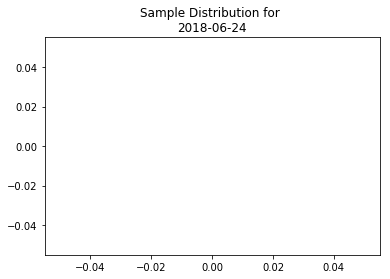

In [12]:
plt.title("Sample Distribution for \n"+str(now))
plt.scatter(weather_df.Longitude,weather_df.Latitude,facecolors="red",s=5, edgecolors="black",alpha=0.75)

ValueError: min() arg is an empty sequence

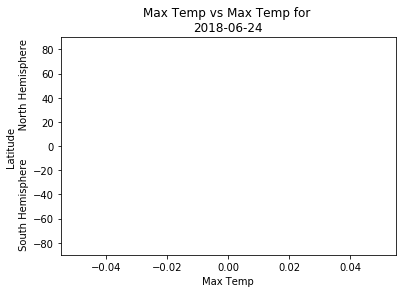

In [13]:
sns.kdeplot(weather_df.Max_Temp,weather_df.Latitude,{'axes.grid': True},cmap="icefire",alpha=0.45)
plt.scatter(weather_df.Max_Temp,weather_df.Latitude,facecolors="red",s=50, edgecolors="black",alpha=0.65)

plt.title("Max Temp vs Max Temp for \n"+str(now))
plt.xlabel("Max Temp")
plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')
plt.ylim((-90,90))
plt.xlim((min(weather_df.Max_Temp)-5,max(weather_df.Max_Temp)+5))


plt.savefig("Latitude V Max Temp"+'_'+str(now)+'.png')

__ Temperature V Latitude__<br>
Density and scatter plot combined in the above plot shows a clear relationship.<br>
Temperatures nearer the equator are warmer.<br>
This relationship will be expected to fluctuate.<br>



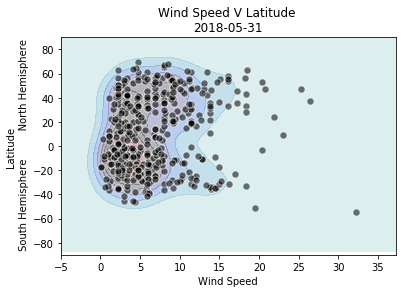

In [55]:
sns.kdeplot(weather_df.Wind_Speed,weather_df.Latitude,{'axes.grid': True},cmap="icefire",alpha=0.35)
plt.scatter(weather_df.Wind_Speed,weather_df.Latitude,facecolors="black", edgecolors="white",s=50,alpha=0.55)

plt.title("Wind Speed V Latitude \n"+str(now))
plt.xlabel("Wind Speed")
plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')

plt.ylim((-90,90))
plt.xlim((-5,max(weather_df.Wind_Speed)+5))


plt.savefig("Wind Speed V Latitude"+'_'+str(now)+'.png')

__Wind Speed V Latitude__<br>
In the above chart you can notice that the higher windspeeds are more common farther<br>
from the equator.


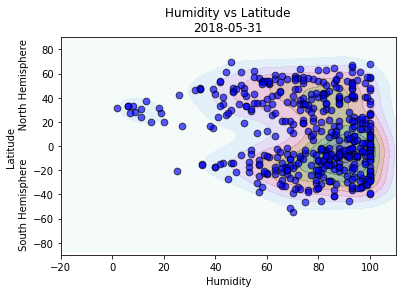

In [51]:
sns.kdeplot(weather_df.Humidity,weather_df.Latitude,{'axes.grid': True},cmap="cubehelix_r",alpha=0.45)
plt.scatter(weather_df.Humidity,weather_df.Latitude, facecolors="blue",s=45, edgecolors="black",alpha=0.65)

plt.title("Humidity vs Latitude\n"+str(now))
plt.xlabel("Humidity")
plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')

plt.ylim((-90,90))
plt.xlim((-20,max(weather_df.Humidity)+10))



plt.savefig("Humidity V Latitude"+'_'+str(now)+'.png')

__Humidity V Latitude__<br>
In the above chart you can notice that the higher humidities are more common closer<br>
to the equator.


ValueError: max() arg is an empty sequence

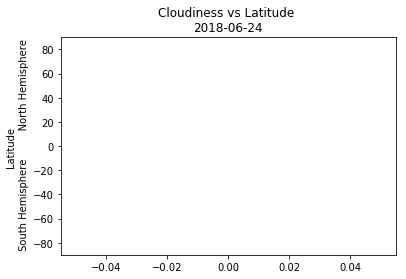

In [14]:
plt.title("Cloudiness vs Latitude \n"+str(now))
sns.kdeplot(weather_df.Cloudiness,weather_df.Latitude,{'axes.grid': True},cmap="bone")
plt.scatter(weather_df.Cloudiness,weather_df.Latitude, facecolors="White",s=45, edgecolors="black",alpha=0.45)

plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')

plt.ylim((-90,90))
plt.xlim((-20,max(weather_df.Cloudiness)+10))

plt.savefig("Cloudiness vs Latitude"+'_'+str(now)+'.png')


__Clouds V Latitude__<br>
In the above chart you can see that cloudy conditions are most prevalent closer<br>
to the equator.